<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 8 Oktober 2023, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Oktober 2023, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [54]:
# Isi dengan data diri Anda
NAMA = "Fahira Adindiah"
NAMA_TEAM_KAGGLE = "Fahira Adindiah"
KELAS = "C"
NPM = "2106751575"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [79]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahira Adindiah dari kelas C dengan NPM 2106751575, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahira Adindiah)


## Deskripsi Dataset

Lab ini akan menggunakan 2 dataset, yakni dataset untuk klasifikasi dan dataset untuk regresi.

Dataset yang digunakan untuk klasifikasi adalah dataset **Red Wine Quality** (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) dengan modifikasi.

Dataset yang akan digunakan untuk regresi adalah dataset **Graduate Admission 2** (https://www.kaggle.com/datasets/mohansacharya/graduate-admissions) dengan modifikasi.

### Deskripsi Dataset Klasifikasi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap kualitas dari suatu Red Wine yang diukur dengan angka 0 sampai dengan 10 (Quality).

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:


*   **Fixed Acidity**: Sebagian besar asam yang terlibat dalam anggur adalah asam tetap atau tidak mudah menguap (tidak menguap dengan mudah).
*   **Volatile Acidity**: Jumlah asam asetat dalam anggur, yang pada kadar yang terlalu tinggi dapat menyebabkan rasa cuka yang tidak enak.
*   **Citric Acid**: Ditemukan dalam jumlah kecil, asam sitrat dapat menambahkan 'kesegaran' dan rasa pada anggur.
*   **Residual Sugar**: Jumlah gula yang tersisa setelah fermentasi berhenti.
*   **Chlorides**: Jumlah kadar garam pada wine.
*   **Free Sulfur Dioxide**: Bentuk bebas SO2 ada dalam keseimbangan antara SO2 molekuler (sebagai gas terlarut) dan ion bisulfit.
*   **Total Sulfur Dioxide**: Jumlah bentuk bebas dan terikat dari SO2.
*   **Density**: Kepadatan air tergantung pada persentase alkohol dan kandungan gula.
*   **pH**: Menggambarkan seberapa asam atau basa suatu anggur pada skala dari 0 (sangat asam) hingga 14 (sangat basa).
*   **Sulphates**: Sebuah tambahan untuk anggur yang dapat berkontribusi pada tingkat gas sulfur dioksida (SO2).
*   **Alcohol**: Persentase kandungan alkohol dalam anggur.
*   **Quality**: Variabel keluaran (berdasarkan data sensori, skor antara 0 dan 10).









### Deskripsi Dataset Regresi

Dataset ini berisi informasi mengenai atribut-atribut yang dirasa berpengaruh terhadap besarnya peluang (Chance of Admit) dari seorang pelamar untuk diterima pada program Magister-nya di daerah India.

Atribut-atribut yang terdapat pada dataset ini adalah sebagai berikut:



*   **GRE Scores (out of 340)**: Skor yang diperoleh oleh calon pelamar pada tes GRE.
*   **TOEFL Scores (out of 120)**: Skor yang diperoleh oleh calon pelamar pada tes TOEFL.
*   **University Rating (out of 5)**: Rating universitas yang didaftar oleh calon pelamar.
*  **Statement of Purpose and Letter of Recommendation Strength (out of 5)**: Skor yang diperoleh dari surat rekomendasi yang dilampirkan oleh calon pelamar.
*   **Undergraduate GPA (out of 10)**: GPA yang diperoleh oleh calon pelamar pada saat masa *undergraduate*.
*   **Research Experience (either 0 or 1)**: Ada/tidaknya pengalaman meneliti yang dimiliki oleh calon pelamar. 0 berarti tidak, 1 berarti iya.
*   **Chance of Admit (ranging from 0 to 1)**: Peluang diterimanya calon pelamar pada suatu universitas dengan skor-skor yang dimilikinya.

## Import Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns

## Read Datasets

**Bacalah konten dari masing-masing dataset yang telah disediakan. Perhatikan tipe data dari masing-masing kolom, apakah sudah cocok untuk dijadikan input ke dalam model atau tidak.**

### Dataset Red Wine

**Terapkan proses Read Dataset di bawah cell ini**

In [3]:
df_rw = pd.read_csv("Red_Wine_Quality_Train.csv")

### Dataset Admission Prediction

**Terapkan proses Read Dataset di bawah cell ini**

In [5]:
df_ap = pd.read_csv("Admission_Prediction_Train.csv")

## SOAL 1 Data Pre-processing [20]

**Terapkanlah proses data pre-processing pada bagian ini agar dataset yang telah diberikan dapat dijadikan input dari model yang akan kalian buat. Terapkan proses tersebut untuk masing-masing dataset (Red Wine & Admission Prediction) hingga dataset terbagi menjadi train dan test**

### Dataset Red Wine

**Terapkan proses data pre-processing di bawah cell ini**

In [6]:
total_rows, total_attributes = df_rw.shape
print('Jumlah data:', total_rows)
print('Jumlah atribut:', total_attributes)

df_rw.head()

Jumlah data: 3466
Jumlah atribut: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5


In [7]:
df_rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466 entries, 0 to 3465
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3466 non-null   float64
 1   volatile acidity      3466 non-null   float64
 2   citric acid           3466 non-null   float64
 3   residual sugar        3466 non-null   float64
 4   chlorides             3466 non-null   float64
 5   free sulfur dioxide   3466 non-null   float64
 6   total sulfur dioxide  3466 non-null   float64
 7   density               3466 non-null   float64
 8   pH                    3466 non-null   float64
 9   sulphates             3466 non-null   float64
 10  alcohol               3466 non-null   float64
 11  quality               3466 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 325.1 KB


In [8]:
df_rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000,3466.000000
mean,8.348834,0.583349,0.273910,2.577768,0.089961,13.495787,36.819734,0.996488,3.326449,0.660302,10.719217,5.504616
std,1.685407,0.242381,0.204169,1.231235,0.047654,9.763083,28.441789,0.001901,0.155002,0.159762,1.184774,1.706149
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.403343,3.000000
25%,7.181250,0.388721,0.072523,1.931467,0.069837,6.000000,15.772135,0.995335,3.219348,0.550170,9.788012,4.000000
50%,8.000000,0.546287,0.265653,2.200000,0.078693,10.992790,27.636997,0.996498,3.320000,0.630000,10.550321,6.000000
75%,9.400000,0.722336,0.441431,2.751284,0.092000,18.000000,48.000000,0.997600,3.426453,0.747810,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df_rw.duplicated().sum()

242

In [10]:
df_rw.drop_duplicates(keep='first', inplace=True)
df_rw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,12.200000,0.450000,0.490000,1.400000,0.075000,3.000000,6.000000,0.996900,3.130000,0.630000,10.400000,5
1,7.100000,0.430000,0.170000,1.800000,0.082000,27.000000,51.000000,0.996340,3.490000,0.640000,10.400000,5
2,7.784053,0.280000,0.303572,1.993696,0.061832,17.978987,33.957974,0.995235,3.277268,0.895167,11.285291,7
3,7.960832,0.762917,0.015375,2.490418,0.085412,13.341669,26.512503,0.997363,3.376833,0.470250,9.856252,4
4,7.700000,0.705000,0.100000,2.600000,0.084000,9.000000,26.000000,0.997600,3.390000,0.490000,9.700000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
3459,7.739080,0.747077,0.029631,2.759688,0.082086,13.658457,26.987685,0.996957,3.383169,0.479754,10.093843,4
3460,6.794068,0.811737,0.001186,1.235593,0.255788,15.406785,27.991534,0.994787,3.333644,0.517119,9.808898,3
3461,8.285252,1.017603,0.020000,3.385252,0.083945,6.000000,11.009217,0.998893,3.480645,0.491290,10.990322,3
3463,7.873784,0.350633,0.458011,3.585536,0.077837,15.036160,37.117519,0.997249,3.353345,0.858915,12.810848,8


<AxesSubplot:>

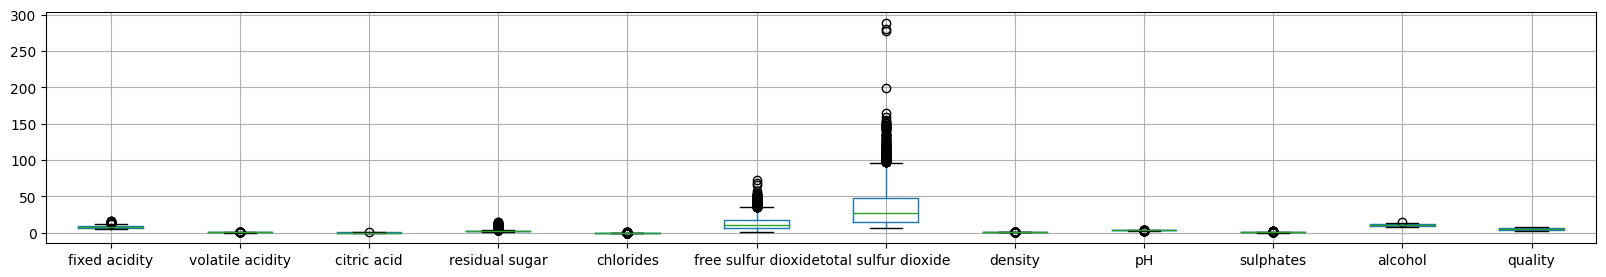

In [11]:
df_rw.boxplot(figsize=(20,3))

Berdasarkan boxplot di atas, `total sulfur dioxide` mengandung banyak outliers. Agar hasil prediksi data lebih akurat, outliers pada `total sulfur dioxide` perlu ditangani.

In [12]:
# Mengurutkan data untuk mencari quartil.
sorted_data = df_rw.sort_values(by=['total sulfur dioxide'])

# Menghitung quartil 1 dan 3.
Q1 = sorted_data['total sulfur dioxide'].quantile(0.25)
Q3 = sorted_data['total sulfur dioxide'].quantile(0.75)

# Menghitung RUB dan RLB.
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Menampilkan banyaknya outlier pada atribut fare.
outliers = []
def detect_outliers(data):
    for i in sorted_data['total sulfur dioxide']:
        if i < lower_limit or i > upper_limit:
            outliers.append(i)
    return outliers
sulfur_dioxide_outliers = detect_outliers(sorted_data['total sulfur dioxide'])
print (len(sulfur_dioxide_outliers))

131


In [13]:
df_rw = sorted_data.loc[(sorted_data['total sulfur dioxide'] > lower_limit) & (sorted_data['total sulfur dioxide'] < upper_limit)]

In [14]:
x_rw = df_rw.drop('quality', axis=1)
y_rw = df_rw['quality']

In [15]:
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(x_rw, y_rw, train_size=0.8, random_state=42)

### Dataset Admission Prediction

**Terapkan proses data pre-processing di bawah cell ini**

In [16]:
total_rows, total_attributes = df_ap.shape
print('Jumlah data:', total_rows)
print('Jumlah atribut:', total_attributes)
df_ap.head()

Jumlah data: 350
Jumlah atribut: 10


,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,5,6,330,115,5,4.5,3.0,9.34,1,0.90
1,116,117,299,102,3,4.0,3.5,8.62,0,0.56
2,45,46,322,110,5,5.0,4.0,9.10,1,0.88
3,16,17,317,107,3,4.0,3.0,8.70,0,0.66
4,462,463,307,105,4,3.0,3.0,7.94,0,0.62


In [17]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         350 non-null    int64  
 1   Serial No.         350 non-null    int64  
 2   GRE Score          350 non-null    int64  
 3   TOEFL Score        350 non-null    int64  
 4   University Rating  350 non-null    int64  
 5   SOP                350 non-null    float64
 6   LOR                350 non-null    float64
 7   CGPA               350 non-null    float64
 8   Research           350 non-null    int64  
 9   Chance of Admit    350 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 27.5 KB


In [18]:
df_ap.describe()

,Unnamed: 0,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,252.054286,253.054286,316.631429,107.254286,3.097143,3.368571,3.485714,8.576343,0.562857,0.724086
std,141.359141,141.359141,10.944959,6.060906,1.156391,0.999218,0.919276,0.594902,0.496743,0.139665
min,1.000000,2.000000,293.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.340000
25%,134.250000,135.250000,309.000000,102.250000,2.000000,2.500000,3.000000,8.130000,0.000000,0.630000
50%,250.500000,251.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000,0.730000
75%,374.500000,375.500000,324.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,499.000000,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [19]:
df_ap.duplicated().sum()

0

<AxesSubplot:>

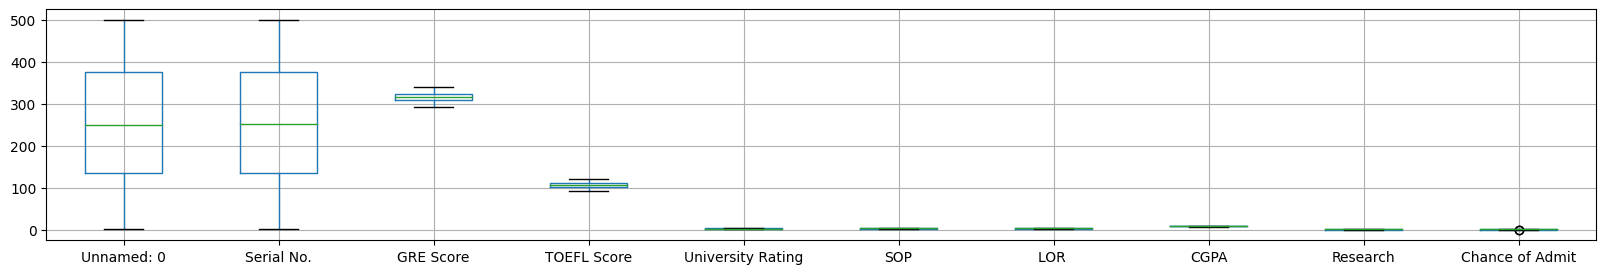

In [20]:
df_ap.boxplot(figsize=(20,3))

In [21]:
x_ap = df_ap.drop(['Chance of Admit', 'Unnamed: 0', 'Serial No.'], axis=1)
y_ap = df_ap['Chance of Admit']

In [22]:
x_train_admission, x_test_admission, y_train_admission, y_test_admission = train_test_split(x_ap, y_ap, train_size=0.8, random_state=42)

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree merupakan model yang beroperasi dengan struktur berbentuk Binary Tree, di mana setiap node hanya dapat memiliki dua child node paling banyak. Dalam bidang data science, model ini diterapkan dalam konteks Supervised Learning, yaitu model dibentuk berdasarkan data training dan selanjutnya digunakan untuk membuat prediksi terhadap data yang disajikan. Data training yang digunakan akan diolah menjadi sebuah rangkaian aturan dalam bentuk Binary Tree. Aturan-aturan ini selanjutnya digunakan untuk proses prediksi pada dataset lain.

#### Training

Function di bawah ini merupakan function yang dapat digunakan untuk menghitung metrics hasil testing, baik untuk kasus regresi, maupun kasus klasifikasi.

In [23]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [24]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))


##### Dataset Red Wine

In [25]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtc_md3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc_md3.fit(x_train_red, y_train_red)

DecisionTreeClassifier(max_depth=3, random_state=42)

##### Dataset Admission Prediction

In [26]:
# Melakukan training pada model decision tree
# Sesuaikan nama variable X_train dan y_train kamu
dtr_md3 = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr_md3.fit(x_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=3, random_state=42)

#### Evaluation

##### Dataset Red Wine

In [27]:
# Memprediksi data testing
prediction = dtc_md3.predict(x_test_red)

# Call the metrics function
classification_metrics(prediction, y_test_red)

Accuracy: 0.5040387722132472
F1 Score: 0.43191390731639917
Recall Score: 0.4734331497329285
Precision Score: 0.5606400646120794


##### Dataset Admission Prediction

In [28]:
# Memprediksi data testing
prediction = dtr_md3.predict(x_test_admission)

# Call the metrics function
regression_metrics(prediction, y_test_admission)

MAE: 0.05986515898240107
MSE: 0.005800921525014944
RMSE: 0.07616378092646757
R_squared: 0.6376365279751508


#### Hyperparameter


Hyperparameter adalah parameter yang dapat kita sesuaikan atau konfigurasi sebelum memulai proses pembangunan model. Tujuan dari penyesuaian ini adalah untuk mengoptimalisasi performa model sehingga diharapkan dapat berfungsi lebih efektif.

> Ada beberapa jenis hyperparameter yang terdapat dalam beragam algoritma machine learning, termasuk dalam algoritma Decision Tree. Beberapa hyperparameter yang ada dalam algoritma Decision Tree yang disediakan oleh modul sklearn.tree antara lain:

- `criterion`: Metrik yang digunakan untuk mengevaluasi kualitas pemisahan node, contohnya:
- `squared_error`: menggunakan reduksi varians sebagai kriteria seleksi fitur dan meminimalkan kerugian L2 dengan menggunakan mean dari setiap node terminal
- `friedman_mse`: menghitung mean squared error dengan Friedman's improvement score untuk kemungkinan pemisahan (tidak perlu khawatir, ini tidak akan keluar di ujian)
- `absolute_error`: meminimalkan kerugian L1 dengan menggunakan median dari setiap node terminal
- `poisson`: memanfaatkan reduksi dalam Poisson deviance untuk menentukan pemisahan
- `max_depth`: Membatasi kedalaman maksimum dari pohon
- `min_samples_split`: Menentukan jumlah minimum sampel yang dibutuhkan untuk memecah sebuah node internal
Untuk informasi lebih detail, Anda bisa merujuk pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [29]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dtr_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dtr_md6.fit(x_train_admission, y_train_admission)

# Memprediksi data testing
predicted6 = dtr_md6.predict(x_test_admission)

# Menampilkan metrics evaluasi
regression_metrics(predicted6, y_test_admission)

MAE: 0.06393043147328863
MSE: 0.008073586762933677
RMSE: 0.08985313997258904
R_squared: 0.4956710035647356


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 3` model menghasilkan *MAE* 0.04837917276086966 dan *RMSE* 0.06888923287937174. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada penurunan pada performa model dengan *MAE* 0.049144375215427846 dan *RMSE* 0.0704508435958617

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan



Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset Admission Prediction tanpa max depth:

In [30]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train_admission, y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(x_ap.columns).array))

|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- CGPA <= 7.65
|   |   |   |   |   |--- GRE Score <= 301.00
|   |   |   |   |   |   |--- CGPA <= 7.61
|   |   |   |   |   |   |   |--- SOP <= 1.75
|   |   |   |   |   |   |   |   |--- LOR  <= 2.75
|   |   |   |   |   |   |   |   |   |--- LOR  <= 2.25
|   |   |   |   |   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |   |   |   |   |--- LOR  >  2.25
|   |   |   |   |   |   |   |   |   |   |--- value: [0.44]
|   |   |   |   |   |   |   |   |--- LOR  >  2.75
|   |   |   |   |   |   |   |   |   |--- value: [0.53]
|   |   |   |   |   |   |   |--- SOP >  1.75
|   |   |   |   |   |   |   |   |--- CGPA <= 7.42
|   |   |   |   |   |   |   |   |   |--- CGPA <= 7.00
|   |   |   |   |   |   |   |   |   |   |--- value: [0.36]
|   |   |   |   |   |   |   |   |   |--- CGPA >  7.00
|   |   |   |   |   |   |   |   |   |   |--- CGPA <= 7.35
|   |   |   |   |   |   |   | 

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [31]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(x_train_admission, y_train_admission)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(x_ap.columns).array))

|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- value: [0.46]
|   |   |   |--- CGPA >  7.66
|   |   |   |   |--- value: [0.55]
|   |   |--- GRE Score >  305.50
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.60]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- CGPA <= 8.34
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.69]
|   |   |--- CGPA >  8.34
|   |   |   |--- GRE Score <= 306.50
|   |   |   |   |--- value: [0.65]
|   |   |   |--- GRE Score >  306.50
|   |   |   |   |--- value: [0.73]
|--- CGPA >  8.93
|   |--- CGPA <= 9.18
|   |   |--- CGPA <= 9.05
|   |   |   |--- GRE Score <= 311.00
|   |   |   |   |--- value: [0.66]
|   |   |   |--- GRE Score >  311.00
|   |   |   |   |--- value: [0.80]
|   |   |--- CGPA >  9.05
|   |   |   |--- University 

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*).

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

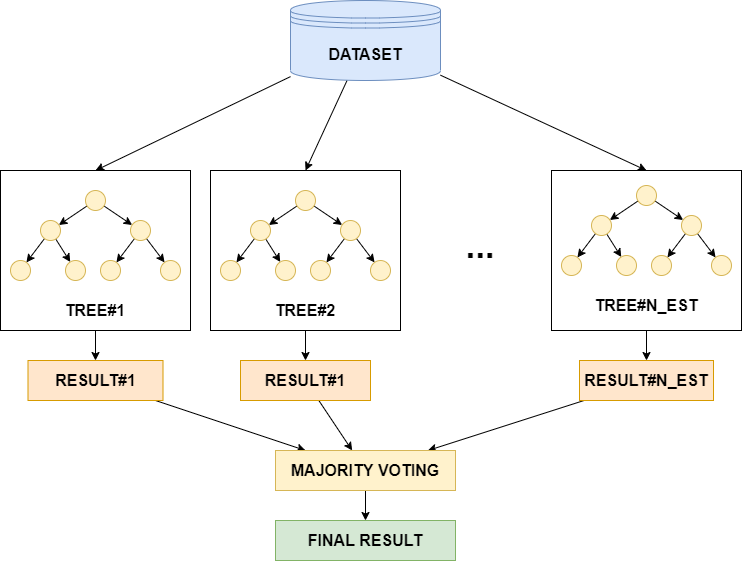

Sumber: Lab 4 KASDD Gasal 2023

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [32]:
# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(x_train_admission, y_train_admission)

# Memprediksi data testing
predicted = rf_md.predict(x_test_admission)

# Menampilkan metrics
regression_metrics(predicted, y_test_admission)

MAE: 0.04900571428571439
MSE: 0.004391432285714293
RMSE: 0.0662678827616689
R_squared: 0.7256824379796534


In [33]:
rf_red_paramless = RandomForestClassifier()
rf_red_paramless.fit(x_train_red, y_train_red)

predicted = rf_red_paramless.predict(x_test_red)

classification_metrics(predicted, y_test_red)

Accuracy: 0.8497576736672051
F1 Score: 0.818898942748512
Recall Score: 0.8236543549043548
Precision Score: 0.8206758615787256


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan untuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [34]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()
clf = GridSearchCV(estimator= dt,
                   param_grid=param_grid, cv= 5)

clf.fit(x_train_admission, y_train_admission)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [35]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 20}

In [36]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(x_train_admission, y_train_admission)
predicted = best_hp.predict(x_test_admission)
regression_metrics(predicted, y_test_admission)

MAE: 0.05850125734504328
MSE: 0.00677990531436717
RMSE: 0.0823401804368145
R_squared: 0.5764828020652313


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

## BONUS ROUND: Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk **mendapatkan nilai tambahan**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Regression Case](https://www.kaggle.com/competitions/lab-4-regression-case?rvi=1)
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/lab-4-klasifikasi-kualitas-wine)

**Nilai Bonus**

Penentuan peserta yang mendapatkan nilai bonus akan ditentukan sesuai dengan peringkat dari masing-masing peserta di leaderboard, semakin tinggi peringkat kalian, semakin besar nilai bonus yang akan kalian dapatkan.


# Latihan Soal

## SOAL 2 [10]

### SOAL 2a
[2.5] Bangun dan latih 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) dengan memberikan nilai pada *hyperparameter*:
- `max_depth = 4`
- `random_state = 2023`.

In [37]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=4
dtc_md4 = DecisionTreeClassifier(max_depth=4, random_state=2023)
dtc_md4.fit(x_train_red, y_train_red)

DecisionTreeClassifier(max_depth=4, random_state=2023)

In [38]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=4
dtr_md4 = DecisionTreeRegressor(max_depth=4, random_state=2023)
dtr_md4.fit(x_train_admission, y_train_admission)

DecisionTreeRegressor(max_depth=4, random_state=2023)

### SOAL 2b
[2.5]  Visualisasikan 2 model decision tree (decision tree regressor untuk admission dan decision tree classifier untuk red wine) yang didapat pada soal 1a!

In [39]:
print("Red wine - Decision tree classifier")
print(tree.export_text(dtc_md4, feature_names=pd.Series(x_rw.columns).array))

Red wine - Decision tree classifier
|--- sulphates <= 0.64
|   |--- chlorides <= 0.11
|   |   |--- volatile acidity <= 0.75
|   |   |   |--- total sulfur dioxide <= 14.84
|   |   |   |   |--- class: 4
|   |   |   |--- total sulfur dioxide >  14.84
|   |   |   |   |--- class: 5
|   |   |--- volatile acidity >  0.75
|   |   |   |--- residual sugar <= 3.19
|   |   |   |   |--- class: 4
|   |   |   |--- residual sugar >  3.19
|   |   |   |   |--- class: 3
|   |--- chlorides >  0.11
|   |   |--- volatile acidity <= 0.59
|   |   |   |--- chlorides <= 0.12
|   |   |   |   |--- class: 5
|   |   |   |--- chlorides >  0.12
|   |   |   |   |--- class: 6
|   |   |--- volatile acidity >  0.59
|   |   |   |--- fixed acidity <= 6.71
|   |   |   |   |--- class: 4
|   |   |   |--- fixed acidity >  6.71
|   |   |   |   |--- class: 3
|--- sulphates >  0.64
|   |--- alcohol <= 11.00
|   |   |--- alcohol <= 9.92
|   |   |   |--- free sulfur dioxide <= 23.14
|   |   |   |   |--- class: 6
|   |   |   |--- fr

In [40]:
print("Admission prediction - Decision tree regressor")
print(tree.export_text(dtr_md4, feature_names=pd.Series(x_ap.columns).array))

Admission prediction - Decision tree regressor
|--- CGPA <= 8.93
|   |--- CGPA <= 8.03
|   |   |--- GRE Score <= 305.50
|   |   |   |--- CGPA <= 7.66
|   |   |   |   |--- value: [0.46]
|   |   |   |--- CGPA >  7.66
|   |   |   |   |--- value: [0.55]
|   |   |--- GRE Score >  305.50
|   |   |   |--- GRE Score <= 319.50
|   |   |   |   |--- value: [0.60]
|   |   |   |--- GRE Score >  319.50
|   |   |   |   |--- value: [0.74]
|   |--- CGPA >  8.03
|   |   |--- CGPA <= 8.34
|   |   |   |--- Research <= 0.50
|   |   |   |   |--- value: [0.63]
|   |   |   |--- Research >  0.50
|   |   |   |   |--- value: [0.69]
|   |   |--- CGPA >  8.34
|   |   |   |--- GRE Score <= 306.50
|   |   |   |   |--- value: [0.65]
|   |   |   |--- GRE Score >  306.50
|   |   |   |   |--- value: [0.73]
|--- CGPA >  8.93
|   |--- CGPA <= 9.18
|   |   |--- CGPA <= 9.05
|   |   |   |--- GRE Score <= 311.00
|   |   |   |   |--- value: [0.66]
|   |   |   |--- GRE Score >  311.00
|   |   |   |   |--- value: [0.80]
|   |  

### SOAL 2c

[2.5]  Jika model decision tree regressor diberikan data aktual Chance of Admit 0.96, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Chance of Admit` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Value terdekat dengan Chance of Admit 0.96 adalah 0.95. Value leaf node tersebut didapatkan dari atribut:
- Reasearch > 0.50
- CGPA > 9.47
- CGPA > 9.18
- CGPA > 8.93

Maka, nilai Mean Absolute Error = |0.96 - 0.95| = 0.01

### SOAL 2d

[2.5]  Untuk decision tree classifier, tentukan atribut-atribut dari suatu red wine yang paling berpotensi untuk dikategorikan sebagai kelas 4. Jika terdapat berbagai kemungkinan pasangan atribut yang paling berpotensi, cantumkanlah semua kemungkinan pasangan atribut tersebut.

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Kemungkinan pertama:
- sulphates <= 0.64
- chloride <= 0.11
- volatile acidity <= 0.75
- alcohol > 10.13

Kemungkinan kedua:
- sulphates <= 0.64
- chloride <= 0.11
- volatile acidity > 0.75
- residual sugar <= 3.15

Kemungkinan ketiga:
- sulphates <= 0.64
- chlorides > 0.11
- fixed acidity <= 6.71
- alcohol <= 10.09

## SOAL 3 [15]

### SOAL 3a

[5] Implementasikan 2 model Random Forest (Random Forest Regressor untuk Admission Prediction dan Random Forest Classifier untuk Red Wine) Implementasi pada soal ini akan menggunakan nilai *hyperparameter*
- `max_depth = 3`
- `random_state = 2023`

In [41]:
rfc_md3 = RandomForestClassifier(max_depth=3, random_state=2023)
rfc_md3.fit(x_train_red, y_train_red)

RandomForestClassifier(max_depth=3, random_state=2023)

In [42]:
rfr_md3 = RandomForestRegressor(max_depth=3, random_state=2023)
rfr_md3.fit(x_train_admission, y_train_admission)

RandomForestRegressor(max_depth=3, random_state=2023)

### SOAL 3b

[5] Model Random Forest dianggap kurang dapat diinterpretasikan dibandingkan dengan Decision Tree. Apakah penyebab dari hasil tersebut?

Penyebab utama Random Forest dianggap kurang dapat diinterpretasikan dibandingkan Decision Tree adalah tingkat kompleksitas Random Forest lebih tinggi dibandingkan Decision Tree. Hal ini didukung dengan beberapa karakteristik Random Forest sebagai berikut.
- Random Forest dibangun dari banyak Decision Tree secara acak.
- Random Forest tidak selalu menghasilkan prediksi yang mudah dijelaskan dalam bentuk hubungan linear antara fitur dan target. Hal tersebut membuat Random Forest cenderung memiliki lebih banyak fitur daripada Decision Tree.

### SOAL 3c

[5] Mekanisme voting dalam Random Forest Classifier adalah cara di mana model ini membuat prediksi akhir berdasarkan hasil dari beberapa Decision Tree yang membentuk ensemble-nya. Apakah yang membedakan mekanisme ini dengan mekanisme pengambil keputusan pada Decision Tree Classifier?

Pembeda utama antara mekanisme pengambilan keputusan Random Forest Classifier dan Decision Tree Classifier adalah teknik yang digunakannya. Random Forest Classifier menggunakan teknik bootstrapping, yaitu dimana dalam satu pengambilan keputusan akan melibatkan banyak model decision tree. Sementara itu, Decision Tree Classifier hanya menggunakan satu model decision tree. Selain itu, Decision Tree Classifier berpotensi mengalami overfitting untuk kondisi pohon yang terlalu kompleks. Jika terjadi overfitting, maka akan memungkinkan kehilangan data dan perbedaan data antara data train dan data test. Kejadian overfitting tersebut dapat diantisipasi Random Forest Classifier karena mekanisme pengambilan agregasi hasil menggunakan konsep majority voting.

## SOAL 4 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan regresi (Dataset Admission Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi dari kedua model yang sudah didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [43]:
print("Prediksi data testing admission prediction dengan decision tree")
predicted4_admission = dtr_md4.predict(x_test_admission)
regression_metrics(predicted4_admission, y_test_admission)

Prediksi data testing admission prediction dengan decision tree
MAE: 0.05421585146379021
MSE: 0.005105758906433273
RMSE: 0.07145459331934703
R_squared: 0.6810609285647609


In [44]:
print("Prediksi data testing admission prediction dengan random forest")
predicted3_admission = rfr_md3.predict(x_test_admission)
regression_metrics(predicted4_admission, y_test_admission)

Prediksi data testing admission prediction dengan random forest
MAE: 0.05421585146379021
MSE: 0.005105758906433273
RMSE: 0.07145459331934703
R_squared: 0.6810609285647609


Perbandingan:
- MAE: tidak ada perbedaan signifikan atas nilai rata-rata error yang didapat dari model random forest dan decision tree.
- MSE: tidak ada perbedaan signifikan atas nilai hasil selisih kuadrat dari prediksi dan target, lalu di rata-rata.
- RMSE: tidak ada perbedaan siginifikan atar nilai akar dari MSE.
- R_squared: tidak ada perbedaan signifikan antara nilai simpangan model.

Kesimpulan:
Baik model random forest maupun decision tree, keduanya cocok untuk diterapkan ke dataset admission prediction.

## SOAL 5 [15]

* [5] Lakukan prediksi terhadap data *testing* dari permasalahan klasifikasi (Dataset Red Wine Prediction) (`X_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* [5] Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai Accuracy, Precision, Recall, dan F1-Score dari hasil prediksi yang didapat.  
* [5] Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [45]:
print("Prediksi data testing red wine dengan decision tree")
predicted4_red = dtc_md4.predict(x_test_red)
classification_metrics(predicted4_red, y_test_red)

Prediksi data testing red wine dengan decision tree
Accuracy: 0.5411954765751211
F1 Score: 0.497530764873791
Recall Score: 0.5168444754697212
Precision Score: 0.5047702500465412


In [46]:
print("Prediksi data testing red wine dengan random forest")
predicted3_red = rfc_md3.predict(x_test_red)
classification_metrics(predicted3_red, y_test_red)

Prediksi data testing red wine dengan random forest
Accuracy: 0.5864297253634895
F1 Score: 0.5254883260227408
Recall Score: 0.5546917114487173
Precision Score: 0.5468988160197529


Perbandingan:
- Accuracy: nilai accuracy random forest lebih tinggi daripada decision tree.
- F1 score: nilai F1 score random forest lebih tinggi daripada decision tree.
- Recall score: nilai recall score random forest lebih tinggi daripada decision tree.
- Precision score: nilai precision score random forest lebih tinggi daripada decision tree.

Kesimpulan:
Model random forest lebih baik digunakan untuk memprediksi hasil akhir dataset red wine.

## SOAL 6 [15]

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier.

### SOAL 6a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [48]:
param_grid_regressor = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
    'min_samples_split': [2, 5, 10, 20, 50],
    'max_depth': [5, 10, 12, None]
}

param_grid_classifier = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10, 20, 50],
    'max_depth': [5, 10, 12, None]
}

In [49]:
# Decision tree classifier
gs_dtc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_classifier, cv=5)

# Decision tree regressor
gs_dtr = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_regressor, cv=5)

# Random forest classifier
gs_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_classifier, cv=5)

# Random forest regressor
gs_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_regressor, cv=5)

### SOAL 6b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search untuk model Random Forest Regressor, Random Forest Classifier, Decision Tree Regressor, dan Decision Tree Classifier dari nomor 5a.

In [50]:
# Random forest classifier
gs_rfc.fit(x_train_red, y_train_red)

# Random forest regression
gs_rfr.fit(x_train_admission, y_train_admission)

# Decision tree classifier
gs_dtc.fit(x_train_red, y_train_red)

# Decision tree regression
gs_dtr.fit(x_train_admission, y_train_admission)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [2, 5, 10, 20, 50]})

In [126]:
print("Red wine - Decision tree classifier")
print(gs_dtc.best_params_)

print("Red wine - Random forest classifier")
print(gs_rfc.best_params_)

print("Admission prediction - Decision tree regression")
print(gs_dtr.best_params_)

print("Admission prediction- Random forest regression")
print(gs_rfr.best_params_)

Red wine - Decision tree classifier
{'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 10}
Red wine - Random forest classifier
{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Admission prediction - Decision tree regression
{'criterion': 'squared_error', 'max_depth': None, 'min_samples_split': 20}
Admission prediction- Random forest regression
{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 10}


### SOAL 6c
[2.5]

Buatlah 2 model Random Forest (Random Forest Classifier dan Random Forest Regressor) dan 2 model Decision Tree (Decision Tree Classifier dan Decision Tree Regressor) berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [127]:
best_hp_rfc = RandomForestClassifier(**gs_rfc.best_params_)
best_hp_rfc.fit(x_train_red, y_train_red)

RandomForestClassifier(min_samples_split=10)

In [128]:
best_hp_rfr = RandomForestRegressor(**gs_rfr.best_params_)
best_hp_rfr.fit(x_train_admission, y_train_admission)

RandomForestRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_split=10)

In [131]:
best_hp_dtr = DecisionTreeRegressor(**gs_dtr.best_params_)
best_hp_dtr.fit(x_train_admission, y_train_admission)

DecisionTreeRegressor(min_samples_split=20)

In [132]:
best_hp_dtc = DecisionTreeClassifier(**gs_dtc.best_params_)
best_hp_dtc.fit(x_train_red, y_train_red)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=10)

### SOAL 6d
[2.5]

Lakukan 4 buah prediksi (karena terdapat 4 model) dengan X_test dari masing-masing dataset dan **munculkan** hasil evaluasi terhadap label y_test dari masing-masing dataset.

**Note**: Terdapat 2 function metrics, yakni `regression_metrics` dan `classification_metrics`.


In [133]:
print("Red wine - Decision tree classifier")
predicted_dtc = best_hp_dtc.predict(x_test_red)
classification_metrics(predicted_dtc, y_test_red)

Red wine - Decision tree classifier
Accuracy: 0.7512116316639742
F1 Score: 0.7258448918500812
Recall Score: 0.7262014003195173
Precision Score: 0.7257007806035136


In [134]:
print("Red wine - Random forest classifier")
predicted_rfc = best_hp_rfc.predict(x_test_red)
classification_metrics(predicted_rfc, y_test_red)

Red wine - Random forest classifier
Accuracy: 0.8303715670436187
F1 Score: 0.7965397454377506
Recall Score: 0.8020755607561164
Precision Score: 0.7992817567246672


In [135]:
print("Admission prediction - Decision tree regression")
predicted_dtr = best_hp_dtr.predict(x_test_admission)
regression_metrics(predicted_dtr, y_test_admission)

Admission prediction - Decision tree regression
MAE: 0.05850125734504328
MSE: 0.00677990531436717
RMSE: 0.0823401804368145
R_squared: 0.5764828020652314


In [136]:
print("Admission prediction - Random forest regression")
predicted_rfr = best_hp_rfr.predict(x_test_admission)
regression_metrics(predicted_rfr, y_test_admission)

Admission prediction - Random forest regression
MAE: 0.04829364323939352
MSE: 0.004281415232932486
RMSE: 0.06543252427449583
R_squared: 0.7325548221441425


## SOAL 7 [5]
1. [2] Jelaskan konsep bootstrapping dalam konteks Random Forests. Bagaimana hal ini berkontribusi pada keragaman dari berbagai decision trees yang terbentuk?
2. [1] Bagaimana prediksi dari seluruh Decision Tree Regressor digabungkan dalam Random Forest Regressor?
3. [2] Jelaskanlah bagaimana Random Forest dapat digunakan untuk masalah klasifikasi multi-kelas, seperti pada kasus prediksi kelas Red Wine pada Lab 4 ini.

1. Konsep bootstrapping pada Random Forests adalah penggunaan teknik pengambilan sampel acak dengan penggantian untuk membangun setiap Decision Tree dalam ensemble Random Forest. Dengan teknik ini, pohon-pohon yang membentuk decision tree beragam sehingga decision tree yang dihasilkan juga bervariasi. Bootstraping dapat mengurangi overfitting, meningkatkan akurasi prediksi, dan memberikan model yang baik untuk menangani berbagai kasus dalam data yang kompleks.
2. Hasil prediksi dari seluruh decision tree regressor digabungkan dalam random forest regressor melalui proses agregasi (mean atau voting). Untuk metode mean, semua hasil prediksi setiap pohon dalam ensemble diambil dan kemudian dihitung rata-rata dari prediksi tersebut. Sementara itu, metode voting menerapkann hasil prediksi dengan frekuensi tertinggi menjadi hasil prediksi akhir.
3. Pertama, tahap bootstraping, dimana setiap decision tree dilatih menggunakan sample acak. Hasil dari bootstraping adalah variasi decision tree. Decision tree tersebut digunakan untuk memprediksi quality (label yang telah ditentukan di awal). Untuk pengambilan hasil prediksi akhir, karena pada dataset red wine yang diperlukan adalah klasifikasi, maka metode yang digunakan adalah voting majority. Oleh karena itu, hasil akhir diambil berdasarkan kelas yang sering muncul pada setiap decision tree.

## SOAL 8 [5]

1. [2.5] Random Forest memasukkan unsur *randomness* melalui bootstrapping dan *feature selection*. Bagaimanakah hal ini dapat memengaruhi reproduksibilitas hasil, dan apa yang dapat dilakukan untuk memastikan *output* yang konsisten?
2. [2.5] Apakah *scaling* atau *feature normalization* diperlukan untuk Random Forest? Mengapa atau mengapa tidak?


1. Unsur randomness melalui bootstrapping dan feature selection dapat mengubah hasil random forest sewaktu-waktu sesuai iterasinya. Hal tersebut dapat memengaruhi reproducability hasil akhir yang didapat. Oleh karena itu, untuk memastikan output tetap konsisten dapat menggunakan `random_state` agar variasi tidak berubah seiring iterasi yang dijalankan.
2. Scaling dan feature normalization bersifat opsional untuk random forest. Hal ini disebabkan algoritma scaling atau feature normalization berupa partisi-partisi yang tidak berpengaruh signifikan pada hasil akhir. Selain itu, random forest tidak membandingkan nilai antar fitur dan hanya memerlukan nilai absolut untuk menyusun percabangan fiturnya. Oleh karena itu, random forest tidak sensitif terhadap scaling dan normalization.

## Export Data Hasil Prediksi

### Red Wine

In [143]:
df_rw_test = pd.read_csv("Red_Wine_Quality_Test.csv")
x_rw_test = df_rw_test.drop(columns=['Id'])
predicted_rw_test =  best_hp_rfc.predict(x_rw_test)

output = pd.DataFrame({'Id': df_rw_test.Id, 'quality': predicted_rw_test})
output.to_csv('quality.csv', index=False)

### Admission Prediction

In [142]:
df_ap_test = pd.read_csv("admission_test.csv")
x_ap_test = df_ap_test.drop(columns=['Id', 'Serial No.'])
predicted_ap_test = best_hp_rfr.predict(x_ap_test)

# to csv
output = pd.DataFrame({'Id': df_ap_test.Id, 'Chance of Admit': predicted_ap_test})
output.to_csv('chanceofadmit.csv', index=False)